## Dennis Lab Meeting 2/23 

Some of the plots made for 2/23 lab meeting for the Dennis Lab. My initial presentation was supposed to be on 1/14, but was reschedule. In that time, I crated a new version of the dataset and this notebook uses that data. 

I should note, many of the modeling result plots were not made in this notebook, and same with the EDA. I ran out of time to re-import them here. I did my best to put notes in the slides about where each figure came from.

Slides can be found [here](https://docs.google.com/presentation/d/1VejVq65fPVRTBFJm6ce7ISvA6dJ1syWkXQBgaZ9fNpM/edit#slide=id.g612664a96646878b_55).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd

from multiglm.data.dataset_loader import *
from multiglm.models.linear_regression import *
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")

%load_ext autoreload
%autoreload 2

choice_palette = sns.color_palette("Set2", 3)

# Fig 1- Akrami rat weights

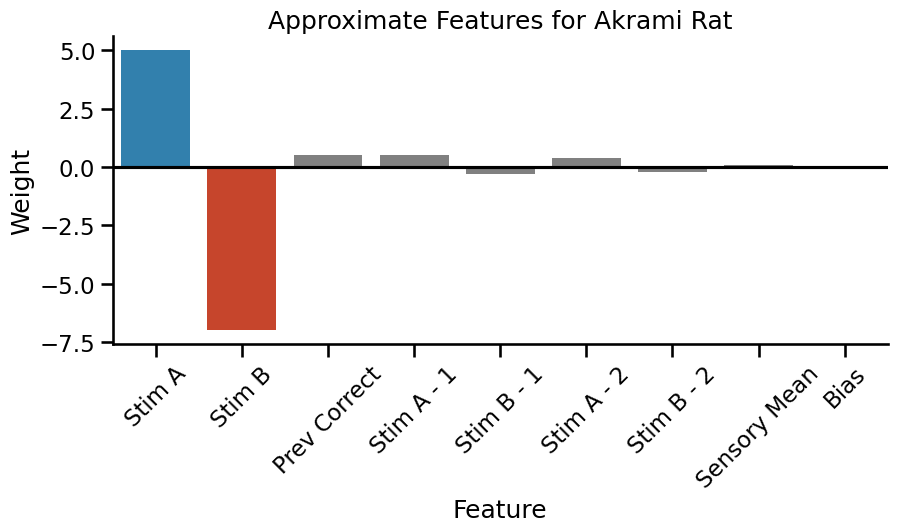

In [3]:
athena_weights_palette = ["#1d85c2", "#e03412", "purple"]
feature = [
    "Stim A",
    "Stim B",
    "Prev Correct",
    "Stim A - 1",
    "Stim B - 1",
    "Stim A - 2",
    "Stim B - 2",
    "Sensory Mean",
    "Bias",
]
weight = [5, -7, 0.5, 0.5, -0.3, 0.4, -0.2, 0.1, 0.04]

color = [
    athena_weights_palette[0],
    athena_weights_palette[1],
    "grey",
    "grey",
    "grey",
    "grey",
    "grey",
    "grey",
    "yellow",
]

simulated_df = pd.DataFrame({"Feature": feature, "Weight": weight, "Color": color})

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    data=simulated_df,
    x="Feature",
    y="Weight",
    hue_order=feature,
    palette=simulated_df.Color,
)
_ = plt.xticks(rotation=45)

ax.axhline(0, color="k")
_ = ax.set_title("Approximate Features for Akrami Rat")
sns.despine()

In [60]:
athena_weights_palette = ["#1d85c2", "#e03412", "purple"]
feature = [
    "Stim A",
    "Stim B",
]
cls = ["R-L", "R-L"]
weight = [5, -7]

color = [
    athena_weights_palette[0],
    athena_weights_palette[1],
]

simulated_df2 = pd.DataFrame(
    {"Feature": feature, "Weight": weight, "Class": cls, "Color": color}
)

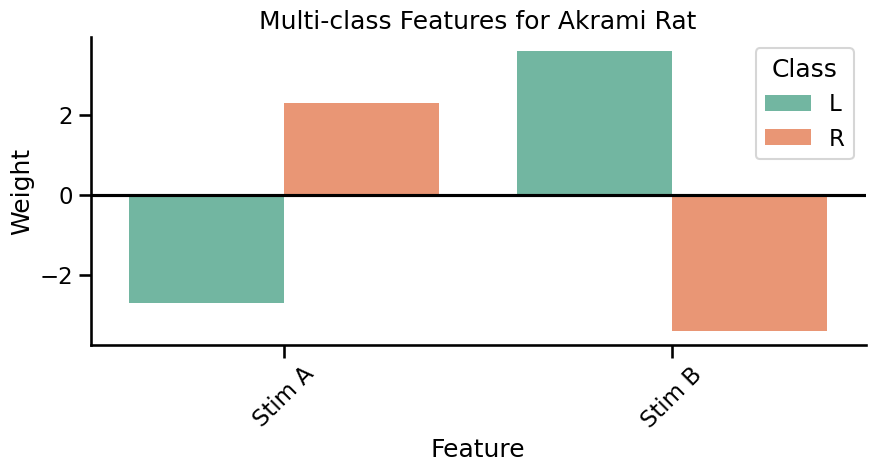

In [69]:
lrv_palette = sns.color_palette("Set2", 3)
feature = [
    "Stim A",
    "Stim A",
    "Stim B",
    "Stim B",
]
weight = [-2.7, 2.3, 3.6, -3.4]
cls = ["L", "R", "L", "R"]

color = [
    lrv_palette[0],
    lrv_palette[1],
    lrv_palette[0],
    lrv_palette[1],
]

simulated_df_multi = pd.DataFrame(
    {"Feature": feature, "Weight": weight, "Color": color, "Class": cls}
)

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    data=simulated_df_multi,
    x="Feature",
    y="Weight",
    hue="Class",
    palette=lrv_palette[:2],
)
_ = plt.xticks(rotation=45)

ax.axhline(0, color="k")
_ = ax.set_title("Multi-class Features for Akrami Rat")
sns.despine()

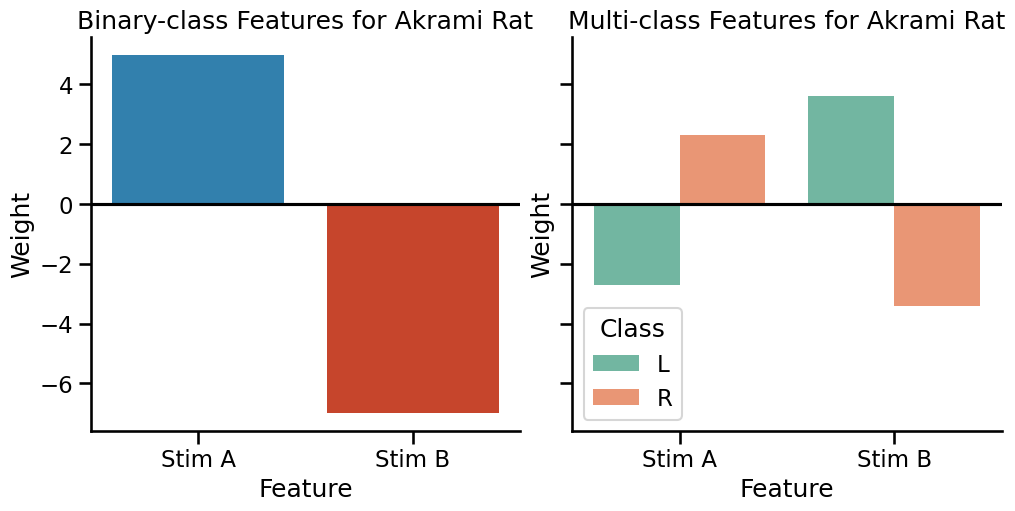

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, constrained_layout=True)

sns.barplot(
    data=simulated_df2,
    x="Feature",
    y="Weight",
    # hue="Class",
    palette=["#1d85c2", "#e03412"],
    ax=ax[0],
)


ax[0].axhline(0, color="k")
_ = ax[0].set_title("Binary-class Features for Akrami Rat")
sns.despine()

sns.barplot(
    data=simulated_df_multi,
    x="Feature",
    y="Weight",
    hue="Class",
    palette=lrv_palette[:2],
    ax=ax[1],
)

ax[1].axhline(0, color="k")
_ = ax[1].set_title("Multi-class Features for Akrami Rat")
sns.despine()

# Figures 2- Violation EDA 

## Load in

In [16]:
full_df = (
    DatasetLoader(
        animal_ids=ANIMAL_IDS, data_type="new_all", relative_data_path="../../data"
    )
    .load_data()
    .query("animal_id != 'W082'")
    .copy()
)
trained_df = (
    DatasetLoader(
        animal_ids=ANIMAL_IDS, data_type="new_trained", relative_data_path="../../data"
    )
    .load_data()
    .query("animal_id != 'W082'")
    .copy()
)

Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']


## Fig 2.1 Trial Results Across A Session

In [5]:
animal_id = "W065"
session_num = 250

session_df = full_df.query("animal_id == @animal_id and session == @session_num").copy()


print(
    f"selected session {session_num} for animal {animal_id} that has {len(session_df)} trials \nwith a hit rate of {session_df.hit.mean():.2f} and violation rate {session_df.violation.mean():.2f}"
)

selected session 250 for animal W065 that has 262 trials 
with a hit rate of 0.79 and violation rate 0.23


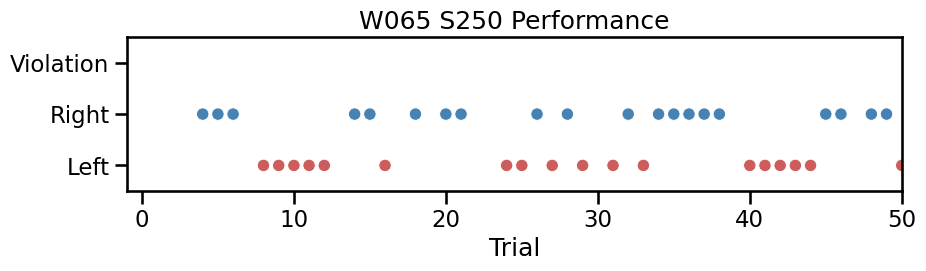

In [6]:
fig, ax = plt.subplots(figsize=(10, 2))

sns.scatterplot(
    data=session_df,
    x="trial",
    y="choice",
    hue="choice",
    hue_order=[0, 1, 2],  # fyi cant have any other order
    palette=["indianred", "steelblue", "white"],
    legend=False,
)
ax.set_yticks([0, 1, 2])  # Set the positions for the labels
ax.set_yticklabels(["Left", "Right", "Violation"])  # Set the label text

_ = ax.set(
    xlabel="Trial",
    ylabel="",
    title=f"{animal_id} S{session_num} Performance",
    xlim=(-1, 50),
    ylim=(-0.5, 2.5),
)

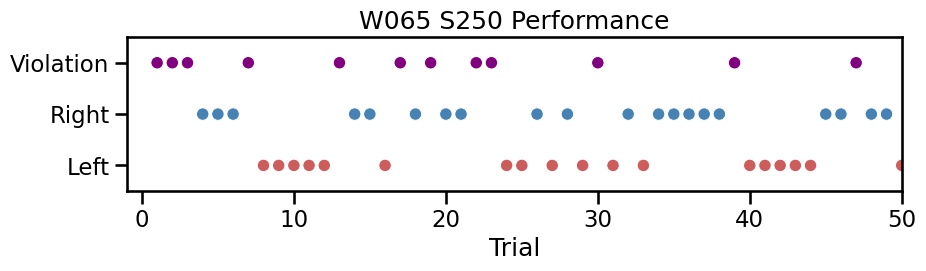

In [7]:
fig, ax = plt.subplots(figsize=(10, 2))

sns.scatterplot(
    data=session_df,
    x="trial",
    y="choice",
    hue="choice",
    hue_order=[0, 1, 2],  # fyi cant have any other order
    palette=["indianred", "steelblue", "purple"],
    legend=False,
)
ax.set_yticks([0, 1, 2])  # Set the positions for the labels
ax.set_yticklabels(["Left", "Right", "Violation"])  # Set the label text

_ = ax.set(
    xlabel="Trial",
    ylabel="",
    title=f"{animal_id} S{session_num} Performance",
    xlim=(-1, 50),
    ylim=(-0.5, 2.5),
)

## Fig 2.2 Overall Frac of Violation Trials

I tired to do this on an animal, session basis, but because not all sessions had all three choices, the code was breaking and the final proportions plotted did not sum to one. Would be good to implement this another time. I think the overall right might end up being slightly lower. 

Numbers don't change much if looking only at stage 3/4 or stage 4 data.

In [17]:
full_df["choice_cat"] = full_df.choice.astype("category")
vs = full_df.query("training_stage > 0").groupby("animal_id").violation.mean().values

vs.std(), vs.mean()

(0.05761079092960001, 0.1852361860726564)

In [18]:
# Count the occurrences of each combination of 'animal_id' and 'choice_cat'
grouped_data = (
    full_df.groupby(["animal_id", "choice_cat"]).size().reset_index(name="count")
)

# Calculate the total count for each animal
total_count_per_animal = (
    full_df.groupby("animal_id").size().reset_index(name="total_count")
)

# Merge the two dataframes to get both count and total_count in one dataframe
merged_data = pd.merge(grouped_data, total_count_per_animal, on="animal_id")

# Calculate the proportion
merged_data["proportion"] = merged_data["count"] / merged_data["total_count"]
choice_mapping = {0: "Left", 1: "Right", 2: "Violation"}
merged_data["choice_label"] = merged_data["choice_cat"].map(choice_mapping)

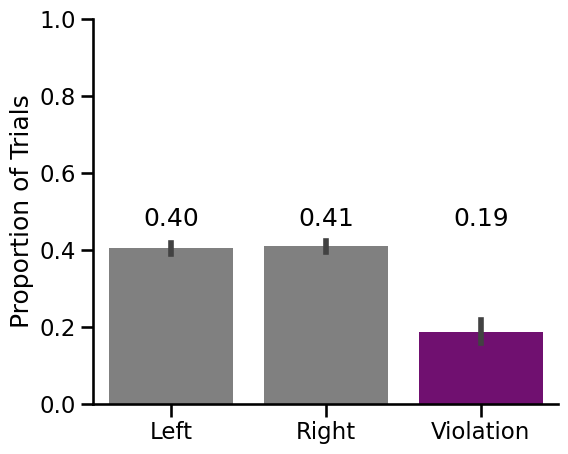

In [19]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(
    x="choice_label",
    y="proportion",
    data=merged_data,
    palette=["grey", "grey", "purple"],
    ax=ax,
)

ax.set(
    xlabel="",
    ylabel="Proportion of Trials",
    ylim=(0, 1),
)


hue_order = sorted(
    merged_data["choice_cat"].unique(),
)


for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        0.45,
        f"{bar.get_height():.2f}",  # Format to 2 decimal places
        ha="center",
        va="bottom",
    )
sns.despine()

## Figure 2.3a Trained Hit Rate ~ Violation Rate

OLS with session avg hit rate ~ session avg violation rate

In [33]:
full_hit_viol_rates = (
    full_df.groupby(["animal_id", "session"])
    .agg({"hit": "mean", "violation": "mean"})
    .reset_index()
    .groupby(["animal_id"])
    .agg({"hit": "mean", "violation": "mean"})
    .rename(columns={"hit": "hit_rate", "violation": "violation_rate"})
    .reset_index()
)

In [34]:
x = "violation_rate"
y = "hit_rate"
results = univariate_linear_regression(full_hit_viol_rates, x, y, print_results=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     3.352
Date:                Wed, 21 Feb 2024   Prob (F-statistic):             0.0885
Time:                        12:26:04   Log-Likelihood:                 28.958
No. Observations:                  16   AIC:                            -53.92
Df Residuals:                      14   BIC:                            -52.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8290      0.036     23.014      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: title={'center': 'Hit Rate ~ Violation Rate'}, xlabel='Session Avg. Violation Rate', ylabel='Session Avg. Hit Rate'>

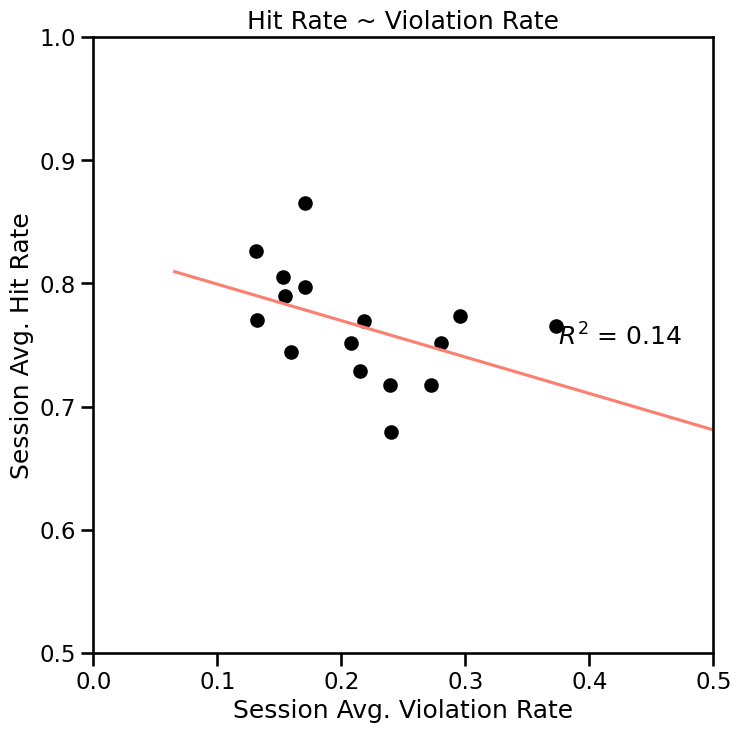

In [35]:
plot_univariate_linear_regression(
    results,
    xlabel="Session Avg. Violation Rate",
    ylabel="Session Avg. Hit Rate",
    title=f"Hit Rate ~ Violation Rate",
    ylim=(0.5, 1),
    xlim=(0, 0.5),
)

In [21]:
trained_hit_viol_rates = pd.read_csv(
    "../../data/processed/from_eda/01_trained_session_avg_hit_viol_rates.csv"
)

x = "trained_violation"
y = "trained_hit"
results = univariate_linear_regression(trained_hit_viol_rates, x, y, print_results=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.701
Date:                Wed, 21 Feb 2024   Prob (F-statistic):             0.0749
Time:                        10:56:08   Log-Likelihood:                 31.054
No. Observations:                  16   AIC:                            -58.11
Df Residuals:                      14   BIC:                            -56.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8663      0.031     27.732      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: title={'center': 'Hit Rate ~ Violation Rate'}, xlabel='Session Avg. Violation Rate', ylabel='Session Avg. Hit Rate'>

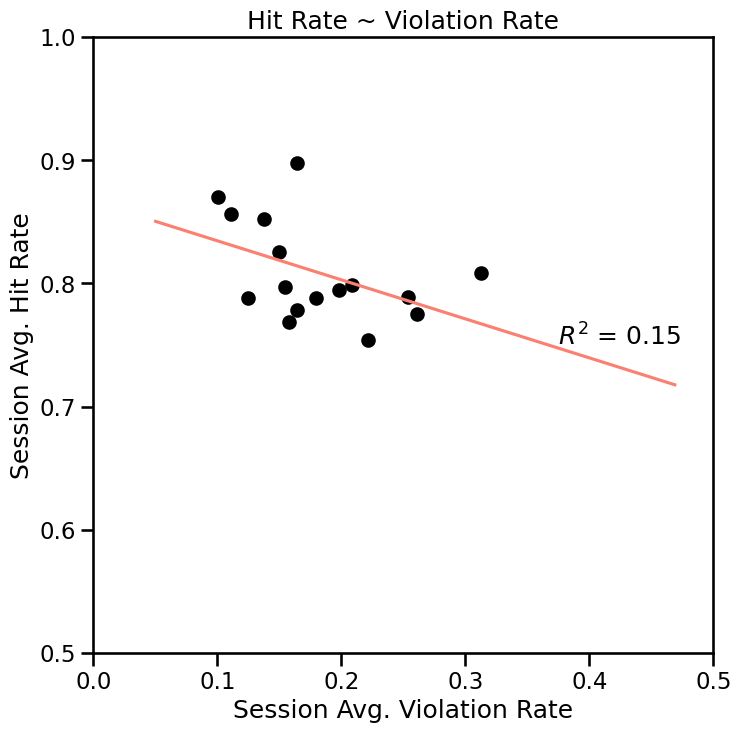

In [22]:
plot_univariate_linear_regression(
    results,
    xlabel="Session Avg. Violation Rate",
    ylabel="Session Avg. Hit Rate",
    title=f"Hit Rate ~ Violation Rate",
    ylim=(0.5, 1),
    xlim=(0, 0.5),
)

## Figure 2.3b Final Hit Rate ~ Regressor- See EDA 02

## Fig 2.3c Distribution of Violation Rates Across a Session

The functions below do the following:

1. Find valid sessions for an animal that have a minimum number of trials and maximum violation rate
2. In each session that meets that criteria, grab the trials in "start", "middle", and "end" ranges.
    * e.g. first 50, middle 50, last 50 trials with a relative marker for the latter two
3. plot the probability of a violation for each trial bin in "start", "middle" or "end" dfs as a line plot with 95% CIs

Note: this was run with and without drop animals and results were similar so current plots are with drop animals removed.

In [26]:
def find_valid_sessions(
    trials_df, minimum_session_trials=100, max_session_violation_rate=0.5
):
    # Count the number of trials in each session
    trial_count = trials_df.groupby("session").size()

    # Calculate the violation rate per session
    violation_rate = trials_df.groupby("session")["violation"].mean()

    valid_sessions = violation_rate[
        (violation_rate < max_session_violation_rate)
        & (trial_count > minimum_session_trials)
    ].index

    return valid_sessions


def grab_start_trials(n_trials, trials_df):
    return trials_df.groupby("session").head(n_trials)


def grab_end_trials(n_trials, trials_df):
    end_trials = trials_df.groupby("session").tail(n_trials).copy()
    end_trials["relative_trials"] = end_trials.groupby("session").cumcount() + 1
    return end_trials


def grab_middle_trials(n_trials, trials_df):
    middle_trials_df = pd.DataFrame()
    for session, group_df in trials_df.groupby("session"):
        total_trials = len(group_df)
        start_index = int(
            total_trials // 2 - (n_trials / 2)
        )  # find middle minus half of n_trials
        end_index = int(start_index + n_trials)  # start to end index
        middle_trials_single_session = group_df.iloc[start_index:end_index].copy()
        middle_trials_single_session["relative_trials"] = range(
            1, len(middle_trials_single_session) + 1
        )

        middle_trials_df = pd.concat(
            [middle_trials_df, middle_trials_single_session], ignore_index=True
        )
    return middle_trials_df


def find_valid_sessions(
    trials_df, minimum_session_trials=100, max_session_violation_rate=0.5
):
    # Count the number of trials in each session
    trial_count = trials_df.groupby("session").size()

    # Calculate the violation rate per session
    violation_rate = trials_df.groupby("session")["violation"].mean()

    valid_sessions = violation_rate[
        (violation_rate < max_session_violation_rate)
        & (trial_count > minimum_session_trials)
    ].index

    return valid_sessions


def plot_violation_probability_over_trials(df, trail_group, title, **kwargs):
    violation_probability_df = (
        df.groupby(["animal_id", trail_group])["violation"].mean().reset_index()
    )

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 3))
    ax = sns.lineplot(
        x=trail_group, y="violation", data=violation_probability_df, **kwargs
    )

    _ = ax.set(
        xlabel="Trial Number",
        ylabel="P(Violation)",
        title=f"Session {title}",
        ylim=(0, 1),
    )

    return ax

The loop below actually makes each df for each window using functions above, then plots to follow.

In [27]:
start_trials_df = pd.DataFrame()
middle_trials_df = pd.DataFrame()
end_trials_df = pd.DataFrame()

n_trials = 50
minimum_session_trials = 100
max_session_violation_rate = 0.5


for animal_id, group_df in trained_df.groupby("animal_id"):

    valid_sessions = find_valid_sessions(
        group_df, minimum_session_trials, max_session_violation_rate
    )
    group_df = group_df.query(
        "session in @valid_sessions and training_stage== 4"
    ).copy()

    start_trials_df = pd.concat(
        [start_trials_df, grab_start_trials(n_trials, group_df)], ignore_index=True
    )

    middle_trials_df = pd.concat(
        [middle_trials_df, grab_middle_trials(n_trials, group_df)], ignore_index=True
    )

    end_trials_df = pd.concat(
        [end_trials_df, grab_end_trials(n_trials, group_df)], ignore_index=True
    )

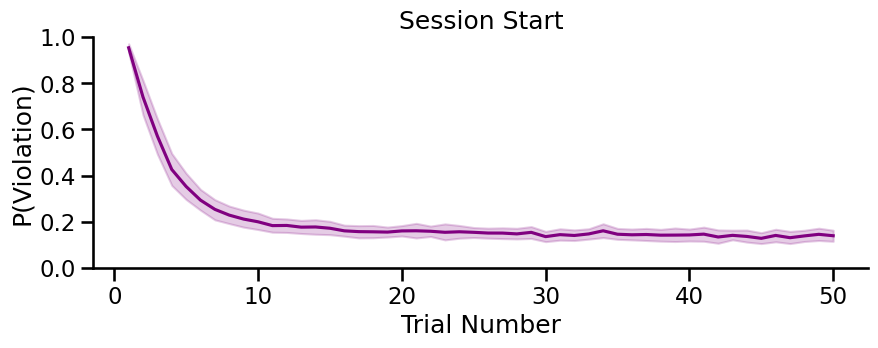

In [28]:
ax = plot_violation_probability_over_trials(
    start_trials_df, "trial", "Start", color="purple"
)

_ = ax.set_xticks(ticks=range(0, n_trials + 1, 10), labels=range(0, n_trials + 1, 10))

sns.despine()

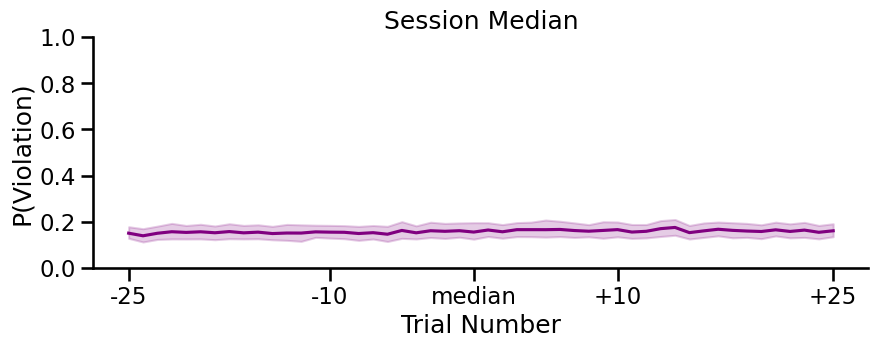

In [29]:
ax = plot_violation_probability_over_trials(
    middle_trials_df, "relative_trials", "Median", color="purple"
)
_ = ax.set_xticks(
    ticks=(1, 15, 25, 35, 50), labels=("-25", "-10", "median", "+10", "+25")
)
sns.despine()

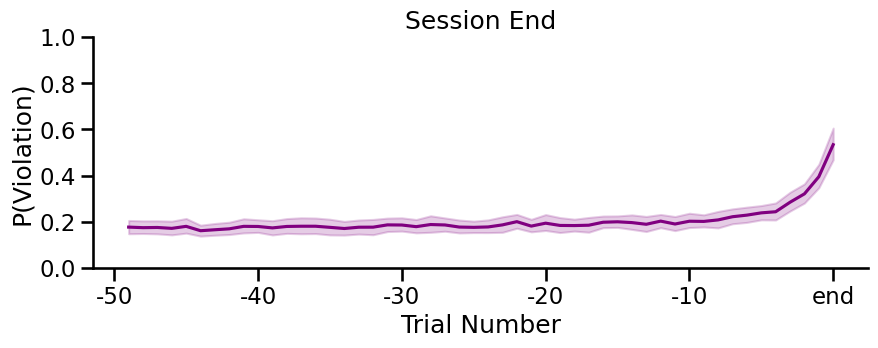

In [30]:
ax = plot_violation_probability_over_trials(
    end_trials_df, "relative_trials", "End", color="purple"
)

_ = ax.set_xticks(
    ticks=range(0, n_trials + 1, 10), labels=("-50", "-40", "-30", "-20", "-10", "end")
)
sns.despine()